<a href="https://colab.research.google.com/github/jubymariajoseph/DSA-Activities/blob/main/Model_case_study.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Model prediction for a company to know how many of their customers wil leave or be part of the company. Finding the best model that finds the people leaving the company.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats.mstats import winsorize
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score,recall_score,f1_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier

Training on the training dataset

In [2]:
df = pd.read_csv("/content/Training_data.csv")
df

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,9509-MPYOD,Female,0,No,No,35,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,One year,No,Mailed check,20.75,700.45,No
1,7746-AWNQW,Female,0,No,No,28,No,No phone service,DSL,No,...,Yes,Yes,No,No,Month-to-month,Yes,Mailed check,35.75,961.4,No
2,2208-UGTGR,Male,0,No,No,56,Yes,Yes,Fiber optic,No,...,No,No,Yes,Yes,Month-to-month,No,Electronic check,98.60,5581.05,No
3,4884-LEVMQ,Male,0,Yes,No,39,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,Yes,Bank transfer (automatic),20.45,790,No
4,6682-VCIXC,Female,0,Yes,Yes,43,No,No phone service,DSL,NaN,...,No,Yes,Yes,No,One year,Yes,Bank transfer (automatic),51.25,2151.6,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5629,5649-RXQTV,Male,0,No,No,51,Yes,No,Fiber optic,No,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.00,5038.15,No
5630,3908-MKIMJ,Male,1,Yes,No,68,No,No phone service,DSL,Yes,...,Yes,No,No,No,Two year,Yes,Electronic check,41.95,2965.75,No
5631,4277-BWBML,Male,0,Yes,Yes,72,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Bank transfer (automatic),19.95,1322.85,No
5632,9110-HSGTV,Female,0,No,No,69,Yes,No,DSL,NaN,...,Yes,Yes,Yes,Yes,Two year,Yes,Credit card (automatic),82.45,5555.3,No


Exploraroty Data Analysis and Handling Missing Values

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5634 entries, 0 to 5633
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        5634 non-null   object 
 1   gender            5465 non-null   object 
 2   SeniorCitizen     5634 non-null   int64  
 3   Partner           5634 non-null   object 
 4   Dependents        5634 non-null   object 
 5   tenure            5634 non-null   int64  
 6   PhoneService      5634 non-null   object 
 7   MultipleLines     5634 non-null   object 
 8   InternetService   5634 non-null   object 
 9   OnlineSecurity    5465 non-null   object 
 10  OnlineBackup      5634 non-null   object 
 11  DeviceProtection  5634 non-null   object 
 12  TechSupport       5634 non-null   object 
 13  StreamingTV       5634 non-null   object 
 14  StreamingMovies   5634 non-null   object 
 15  Contract          5634 non-null   object 
 16  PaperlessBilling  5634 non-null   object 


In [4]:
df.isna().sum()

,0
customerID,0
gender,169
SeniorCitizen,0
Partner,0
Dependents,0
tenure,0
PhoneService,0
MultipleLines,0
InternetService,0
OnlineSecurity,169


In [5]:
df.duplicated().sum()

np.int64(0)

In [6]:
null_rows = df[df['gender'].isna()]
null_rows

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
40,8943-URTMR,NaN,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,Yes,No,Month-to-month,Yes,Mailed check,79.65,152.7,Yes
56,2983-ZANRP,NaN,0,Yes,Yes,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Bank transfer (automatic),73.55,145.4,Yes
60,3981-QSVQI,NaN,0,No,No,8,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Month-to-month,Yes,Bank transfer (automatic),19.70,168.9,No
64,4859-ZSRDZ,NaN,0,Yes,Yes,58,No,No phone service,DSL,No,...,Yes,Yes,Yes,Yes,Two year,Yes,Credit card (automatic),55.50,3166.9,No
67,8364-TRMMK,NaN,0,No,No,3,Yes,Yes,DSL,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,50.65,151.3,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5489,3521-MNKLV,NaN,0,No,No,24,Yes,No,DSL,No,...,Yes,No,No,No,Month-to-month,Yes,Mailed check,49.70,1167.8,No
5503,9688-YGXVR,NaN,0,No,No,44,Yes,No,Fiber optic,No,...,Yes,No,Yes,No,Month-to-month,Yes,Credit card (automatic),88.15,3973.2,No
5509,2800-QQUSO,NaN,0,No,No,42,Yes,Yes,Fiber optic,No,...,No,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,100.30,4222.95,No
5571,2150-UWTFY,NaN,0,Yes,Yes,22,Yes,No,DSL,Yes,...,Yes,No,No,No,Month-to-month,No,Mailed check,61.15,1422.05,Yes


In [7]:
null_rows1 = df[df['OnlineSecurity'].isna()]
null_rows1

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
4,6682-VCIXC,Female,0,Yes,Yes,43,No,No phone service,DSL,NaN,...,No,Yes,Yes,No,One year,Yes,Bank transfer (automatic),51.25,2151.6,No
21,2719-BDAQO,Male,0,No,No,17,Yes,No,Fiber optic,NaN,...,No,No,Yes,Yes,Month-to-month,No,Electronic check,93.85,NaN,Yes
32,6630-UJZMY,Female,1,Yes,No,4,Yes,Yes,Fiber optic,NaN,...,No,No,Yes,No,Month-to-month,Yes,Electronic check,83.25,308.05,No
39,5816-QVHRX,Female,0,No,No,37,Yes,Yes,Fiber optic,NaN,...,No,Yes,Yes,Yes,Month-to-month,No,Credit card (automatic),100.30,3541.4,No
48,3441-CGZJH,Female,0,Yes,Yes,43,No,No phone service,DSL,NaN,...,Yes,Yes,Yes,Yes,One year,Yes,Credit card (automatic),60.40,2640.55,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5453,6341-AEVKX,Female,0,Yes,No,62,Yes,No,Fiber optic,NaN,...,Yes,Yes,Yes,Yes,One year,Yes,Electronic check,104.30,6613.65,No
5470,9793-WECQC,Male,0,No,No,23,Yes,No,Fiber optic,NaN,...,No,No,Yes,Yes,Month-to-month,No,Mailed check,95.30,2192.9,No
5530,5248-YGIJN,Male,0,Yes,No,72,Yes,Yes,DSL,NaN,...,Yes,Yes,Yes,Yes,Two year,Yes,Credit card (automatic),90.25,NaN,No
5554,0214-JHPFW,Female,0,Yes,No,70,No,No phone service,DSL,NaN,...,Yes,Yes,Yes,Yes,Two year,No,Bank transfer (automatic),57.80,4039.3,No


In [8]:
df['OnlineSecurity'].unique()

array(['No internet service', 'No', nan, 'Yes'], dtype=object)

In [9]:
df['OnlineSecurity'].value_counts()


,count
OnlineSecurity,
No,2720
Yes,1574
No internet service,1171


In [10]:
df['gender'].fillna(df['gender'].mode()[0],inplace = True)

/tmp/ipython-input-4201278310.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['gender'].fillna(df['gender'].mode()[0],inplace = True)


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5634 entries, 0 to 5633
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        5634 non-null   object 
 1   gender            5634 non-null   object 
 2   SeniorCitizen     5634 non-null   int64  
 3   Partner           5634 non-null   object 
 4   Dependents        5634 non-null   object 
 5   tenure            5634 non-null   int64  
 6   PhoneService      5634 non-null   object 
 7   MultipleLines     5634 non-null   object 
 8   InternetService   5634 non-null   object 
 9   OnlineSecurity    5465 non-null   object 
 10  OnlineBackup      5634 non-null   object 
 11  DeviceProtection  5634 non-null   object 
 12  TechSupport       5634 non-null   object 
 13  StreamingTV       5634 non-null   object 
 14  StreamingMovies   5634 non-null   object 
 15  Contract          5634 non-null   object 
 16  PaperlessBilling  5634 non-null   object 


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5634 entries, 0 to 5633
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        5634 non-null   object 
 1   gender            5634 non-null   object 
 2   SeniorCitizen     5634 non-null   int64  
 3   Partner           5634 non-null   object 
 4   Dependents        5634 non-null   object 
 5   tenure            5634 non-null   int64  
 6   PhoneService      5634 non-null   object 
 7   MultipleLines     5634 non-null   object 
 8   InternetService   5634 non-null   object 
 9   OnlineSecurity    5465 non-null   object 
 10  OnlineBackup      5634 non-null   object 
 11  DeviceProtection  5634 non-null   object 
 12  TechSupport       5634 non-null   object 
 13  StreamingTV       5634 non-null   object 
 14  StreamingMovies   5634 non-null   object 
 15  Contract          5634 non-null   object 
 16  PaperlessBilling  5634 non-null   object 


In [13]:
df[['OnlineSecurity','InternetService']]

,OnlineSecurity,InternetService
0,No internet service,No
1,No,DSL
2,No,Fiber optic
3,No internet service,No
4,NaN,DSL
...,...,...
5629,No,Fiber optic
5630,Yes,DSL
5631,No internet service,No
5632,NaN,DSL


In [14]:
df.loc[(df['OnlineSecurity'].isna()) & (df['InternetService']=='No'), 'OnlineSecurity']='No internet service'

In [15]:
df.isna().sum()

,0
customerID,0
gender,0
SeniorCitizen,0
Partner,0
Dependents,0
tenure,0
PhoneService,0
MultipleLines,0
InternetService,0
OnlineSecurity,137


In [16]:
df

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,9509-MPYOD,Female,0,No,No,35,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,One year,No,Mailed check,20.75,700.45,No
1,7746-AWNQW,Female,0,No,No,28,No,No phone service,DSL,No,...,Yes,Yes,No,No,Month-to-month,Yes,Mailed check,35.75,961.4,No
2,2208-UGTGR,Male,0,No,No,56,Yes,Yes,Fiber optic,No,...,No,No,Yes,Yes,Month-to-month,No,Electronic check,98.60,5581.05,No
3,4884-LEVMQ,Male,0,Yes,No,39,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,Yes,Bank transfer (automatic),20.45,790,No
4,6682-VCIXC,Female,0,Yes,Yes,43,No,No phone service,DSL,NaN,...,No,Yes,Yes,No,One year,Yes,Bank transfer (automatic),51.25,2151.6,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5629,5649-RXQTV,Male,0,No,No,51,Yes,No,Fiber optic,No,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.00,5038.15,No
5630,3908-MKIMJ,Male,1,Yes,No,68,No,No phone service,DSL,Yes,...,Yes,No,No,No,Two year,Yes,Electronic check,41.95,2965.75,No
5631,4277-BWBML,Male,0,Yes,Yes,72,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Bank transfer (automatic),19.95,1322.85,No
5632,9110-HSGTV,Female,0,No,No,69,Yes,No,DSL,NaN,...,Yes,Yes,Yes,Yes,Two year,Yes,Credit card (automatic),82.45,5555.3,No


In [17]:
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'],errors='coerce')

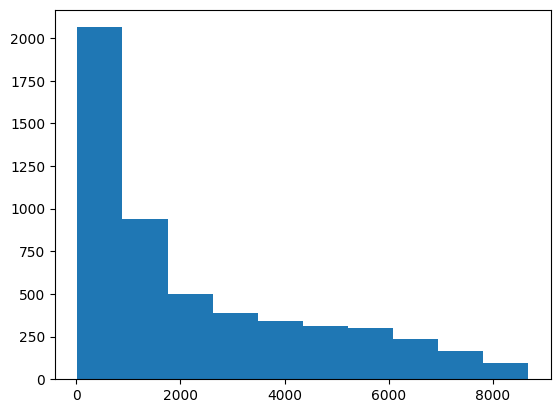

In [18]:

plt.hist(df['TotalCharges']);

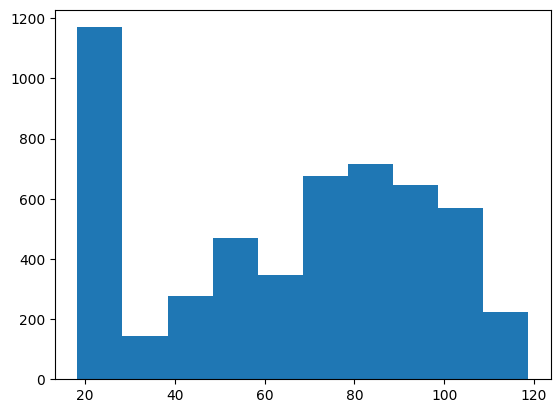

In [19]:
plt.hist(df['MonthlyCharges']);

In [20]:
df['TotalCharges'].fillna(df['TotalCharges'].median(), inplace =True)
df['MonthlyCharges'].fillna(df['MonthlyCharges'].median(), inplace =True)

/tmp/ipython-input-2222068490.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['TotalCharges'].fillna(df['TotalCharges'].median(), inplace =True)
/tmp/ipython-input-2222068490.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, i

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5634 entries, 0 to 5633
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        5634 non-null   object 
 1   gender            5634 non-null   object 
 2   SeniorCitizen     5634 non-null   int64  
 3   Partner           5634 non-null   object 
 4   Dependents        5634 non-null   object 
 5   tenure            5634 non-null   int64  
 6   PhoneService      5634 non-null   object 
 7   MultipleLines     5634 non-null   object 
 8   InternetService   5634 non-null   object 
 9   OnlineSecurity    5497 non-null   object 
 10  OnlineBackup      5634 non-null   object 
 11  DeviceProtection  5634 non-null   object 
 12  TechSupport       5634 non-null   object 
 13  StreamingTV       5634 non-null   object 
 14  StreamingMovies   5634 non-null   object 
 15  Contract          5634 non-null   object 
 16  PaperlessBilling  5634 non-null   object 


In [22]:
df['OnlineSecurity'].fillna(df['OnlineSecurity'].mode()[0], inplace =True)

/tmp/ipython-input-4104987087.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['OnlineSecurity'].fillna(df['OnlineSecurity'].mode()[0], inplace =True)


In [23]:
df.isna().sum()

,0
customerID,0
gender,0
SeniorCitizen,0
Partner,0
Dependents,0
tenure,0
PhoneService,0
MultipleLines,0
InternetService,0
OnlineSecurity,0


Outliers Treatment

In [24]:
num_cols = df.select_dtypes(np.number)
num_cols

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
0,0,35,20.75,700.45
1,0,28,35.75,961.40
2,0,56,98.60,5581.05
3,0,39,20.45,790.00
4,0,43,51.25,2151.60
...,...,...,...,...
5629,0,51,99.00,5038.15
5630,1,68,41.95,2965.75
5631,0,72,19.95,1322.85
5632,0,69,82.45,5555.30


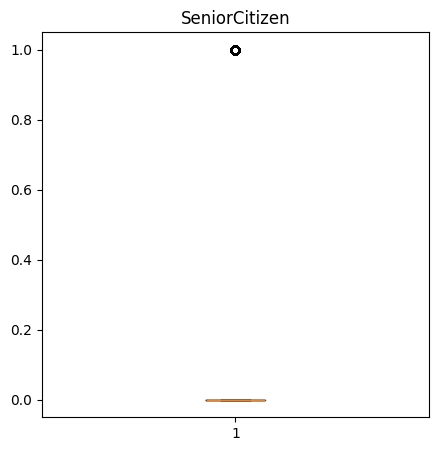

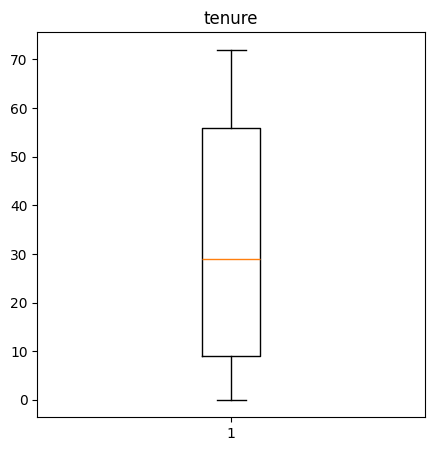

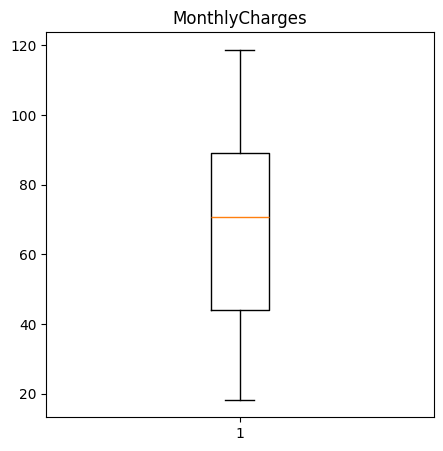

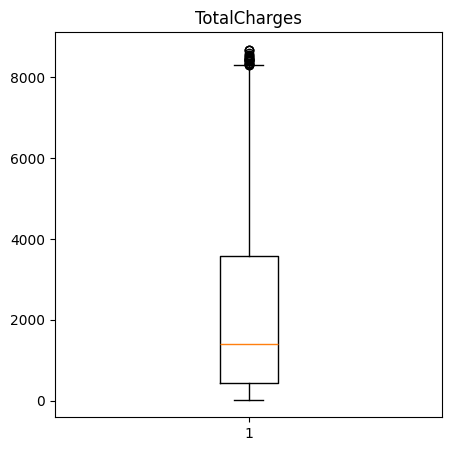

In [25]:
for i in num_cols:

  plt.figure(figsize=(5,5))
  plt.title(i)
  plt.boxplot(df[i])

In [26]:
df['TotalCharges']=winsorize(df['TotalCharges'], limits=(0.02,0.02))

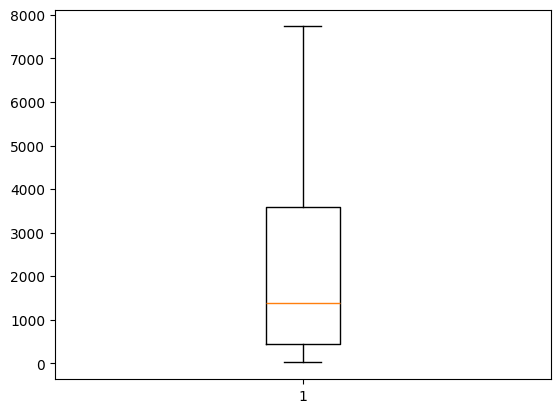

In [27]:
plt.boxplot(df['TotalCharges']);

Encoding and creating a new column

In [29]:
la = LabelEncoder()
df['Contract'] = la.fit_transform(df['Contract'])

In [30]:
df['Customer Lifetime Value'] = df['tenure'] * df['Contract']
df

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,Customer Lifetime Value
0,9509-MPYOD,Female,0,No,No,35,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,1,No,Mailed check,20.75,700.45,No,35
1,7746-AWNQW,Female,0,No,No,28,No,No phone service,DSL,No,...,Yes,No,No,0,Yes,Mailed check,35.75,961.40,No,0
2,2208-UGTGR,Male,0,No,No,56,Yes,Yes,Fiber optic,No,...,No,Yes,Yes,0,No,Electronic check,98.60,5581.05,No,0
3,4884-LEVMQ,Male,0,Yes,No,39,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,2,Yes,Bank transfer (automatic),20.45,790.00,No,78
4,6682-VCIXC,Female,0,Yes,Yes,43,No,No phone service,DSL,No,...,Yes,Yes,No,1,Yes,Bank transfer (automatic),51.25,2151.60,No,43
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5629,5649-RXQTV,Male,0,No,No,51,Yes,No,Fiber optic,No,...,No,Yes,Yes,0,Yes,Electronic check,99.00,5038.15,No,0
5630,3908-MKIMJ,Male,1,Yes,No,68,No,No phone service,DSL,Yes,...,No,No,No,2,Yes,Electronic check,41.95,2965.75,No,136
5631,4277-BWBML,Male,0,Yes,Yes,72,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,2,No,Bank transfer (automatic),19.95,1322.85,No,144
5632,9110-HSGTV,Female,0,No,No,69,Yes,No,DSL,No,...,Yes,Yes,Yes,2,Yes,Credit card (automatic),82.45,5555.30,No,138


In [31]:

df['gender'] = la.fit_transform(df['gender'])
df['Partner'] = la.fit_transform(df['Partner'])
df['Dependents'] = la.fit_transform(df['Dependents'])
df['PhoneService'] = la.fit_transform(df['PhoneService'])
df['MultipleLines'] = la.fit_transform(df['MultipleLines'])
df['InternetService'] = la.fit_transform(df['InternetService'])
df['OnlineSecurity'] = la.fit_transform(df['OnlineSecurity'])
df['OnlineBackup'] = la.fit_transform(df['OnlineBackup'])
df['DeviceProtection'] = la.fit_transform(df['DeviceProtection'])
df['TechSupport'] = la.fit_transform(df['TechSupport'])
df['StreamingTV'] = la.fit_transform(df['StreamingTV'])
df['StreamingMovies'] = la.fit_transform(df['StreamingMovies'])

df['PaperlessBilling'] = la.fit_transform(df['PaperlessBilling'])
df['PaymentMethod'] = la.fit_transform(df['PaymentMethod'])
df['Churn'] = la.fit_transform(df['Churn'])

In [32]:
df['customerID'] = la.fit_transform(df['customerID'])
df['Customer Lifetime Value'] = la.fit_transform(df['Customer Lifetime Value'])

In [33]:
y =df['Churn']
x = df.drop(columns=['Churn','customerID'])

{'whiskers': [<matplotlib.lines.Line2D at 0x7bc4e6628b00>,
 'caps': [<matplotlib.lines.Line2D at 0x7bc4e662a5a0>,
 'boxes': [<matplotlib.lines.Line2D at 0x7bc4e662a810>],
 'medians': [<matplotlib.lines.Line2D at 0x7bc4e6629760>],
 'fliers': [<matplotlib.lines.Line2D at 0x7bc4e6628920>],
 'means': []}

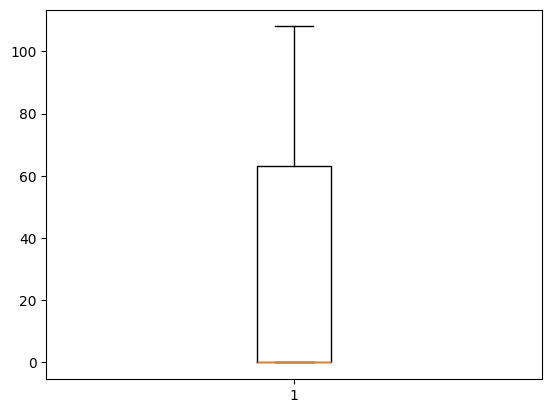

In [36]:
plt.boxplot(x['Customer Lifetime Value'])

In [34]:
df.corr()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,Customer Lifetime Value
customerID,1.000000,0.002758,0.010882,-0.016902,-0.008810,0.010171,0.003599,0.001642,-0.011114,0.008833,...,-0.003322,-0.004452,-0.014240,0.011087,0.011838,0.008126,0.001879,0.002810,-0.012463,0.012421
gender,0.002758,1.000000,0.005492,0.014386,0.017469,0.008027,-0.012031,0.003361,-0.001620,-0.005238,...,0.003210,-0.004217,-0.001177,0.005276,-0.013082,0.002152,-0.005832,-0.004875,-0.010942,0.007867
SeniorCitizen,0.010882,0.005492,1.000000,0.020026,-0.211401,0.022672,-0.001077,0.143242,-0.033889,-0.122685,...,-0.150887,0.029013,0.042213,-0.139901,0.139978,-0.041336,0.205024,0.101970,0.147568,-0.095826
Partner,-0.016902,0.014386,0.020026,1.000000,0.446565,0.380413,0.014722,0.142104,0.005012,0.148273,...,0.133543,0.138860,0.128567,0.297348,-0.023574,-0.161005,0.093530,0.313374,-0.156947,0.318060
Dependents,-0.008810,0.017469,-0.211401,0.446565,1.000000,0.155722,-0.004817,-0.026478,0.049337,0.165043,...,0.129345,0.044647,0.020499,0.240714,-0.119744,-0.041358,-0.110288,0.058018,-0.171100,0.198333
tenure,0.010171,0.008027,0.022672,0.380413,0.155722,1.000000,0.004304,0.341771,-0.029703,0.321757,...,0.329880,0.288592,0.296837,0.675423,0.003805,-0.375795,0.232216,0.798567,-0.358802,0.806581
PhoneService,0.003599,-0.012031,-0.001077,0.014722,-0.004817,0.004304,1.000000,-0.019829,0.389311,-0.003433,...,-0.020865,0.046692,0.040202,-0.005294,0.020433,0.007867,0.239325,0.104037,0.014327,0.004802
MultipleLines,0.001642,0.003361,0.143242,0.142104,-0.026478,0.341771,-0.019829,1.000000,-0.111783,0.003692,...,0.011153,0.183013,0.185827,0.109731,0.168897,-0.175852,0.424434,0.446579,0.037540,0.188311
InternetService,-0.011114,-0.001620,-0.033889,0.005012,0.049337,-0.029703,0.389311,-0.111783,1.000000,-0.018567,...,-0.028547,0.101599,0.096470,0.097203,-0.138948,0.091968,-0.306803,-0.174427,-0.051762,0.032685
OnlineSecurity,0.008833,-0.005238,-0.122685,0.148273,0.165043,0.321757,-0.003433,0.003692,-0.018567,1.000000,...,0.282672,0.037369,0.060127,0.369281,-0.156537,-0.099463,-0.055610,0.238607,-0.292819,0.358770


Splitting the data horizontally

In [35]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2,random_state=42)

Scaling the data

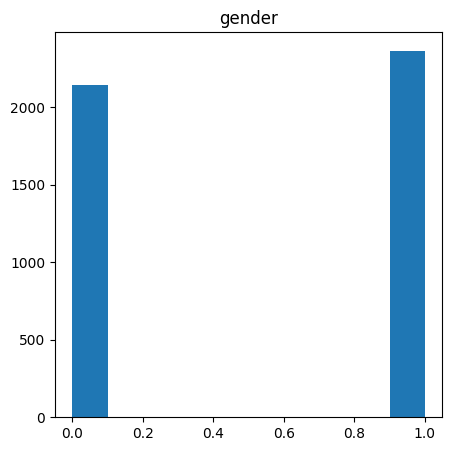

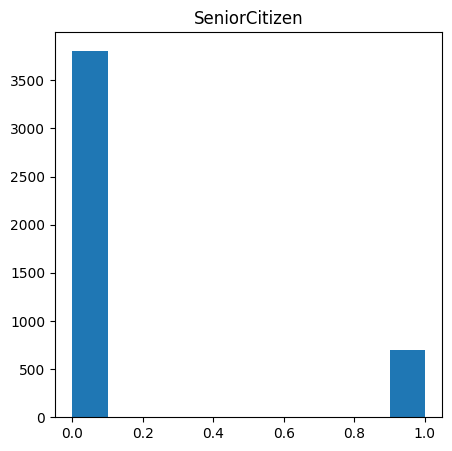

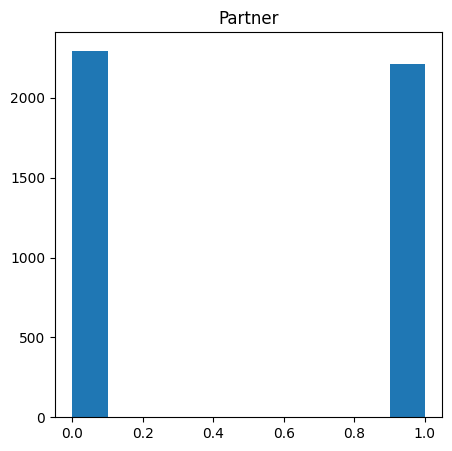

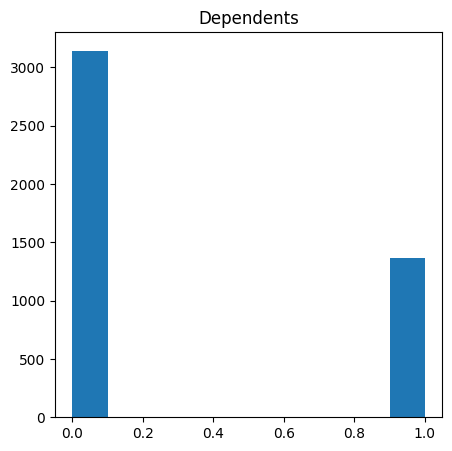

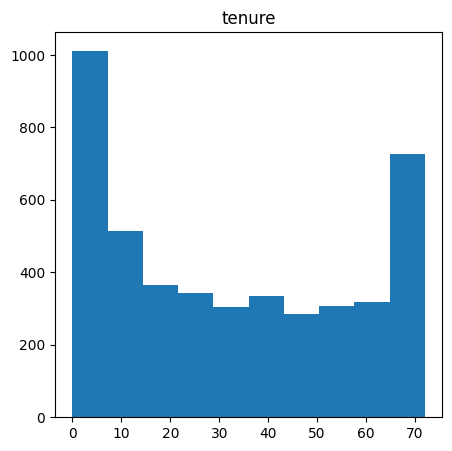

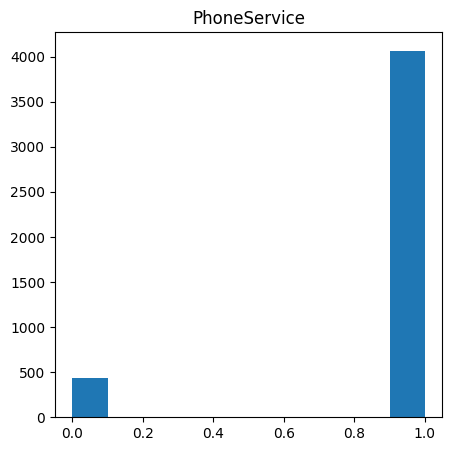

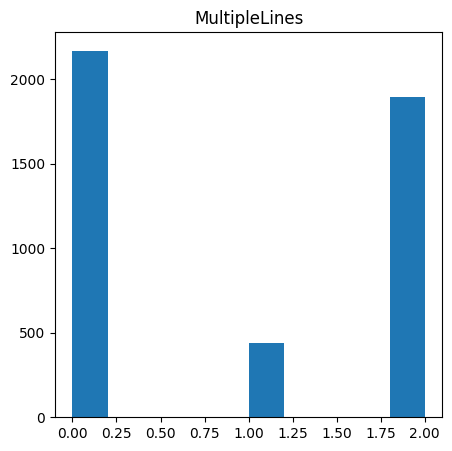

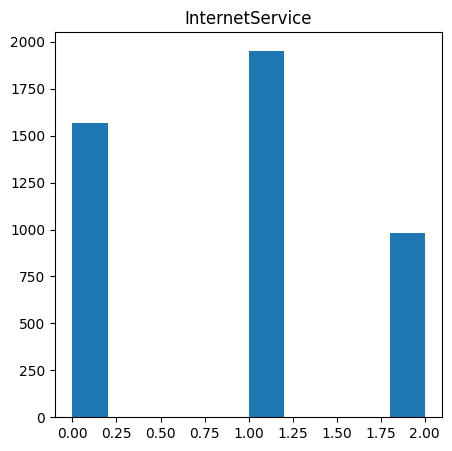

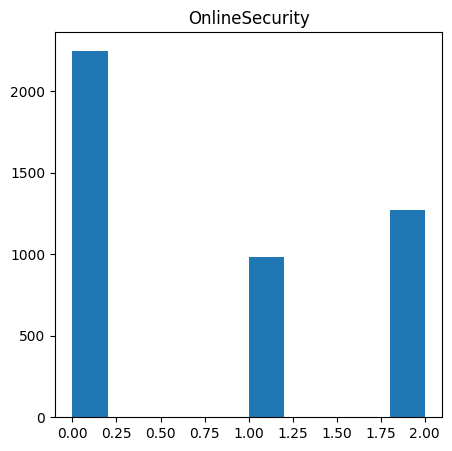

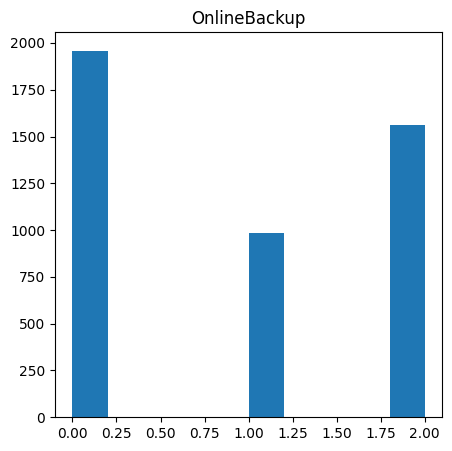

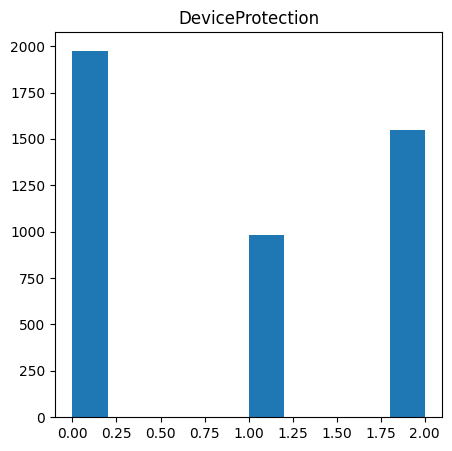

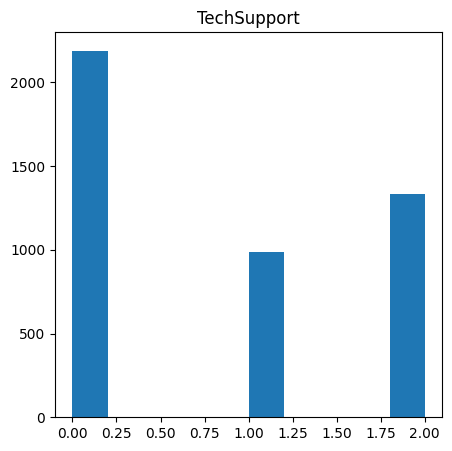

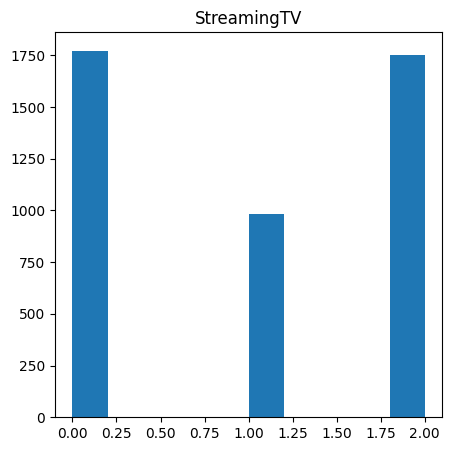

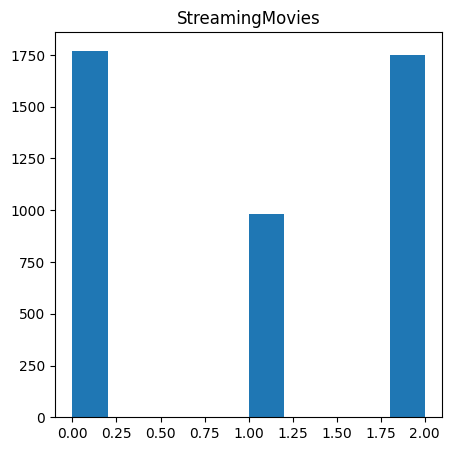

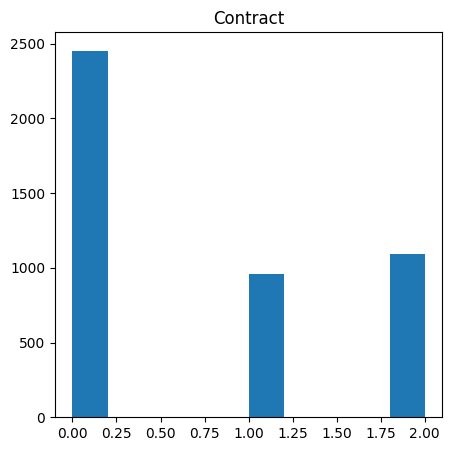

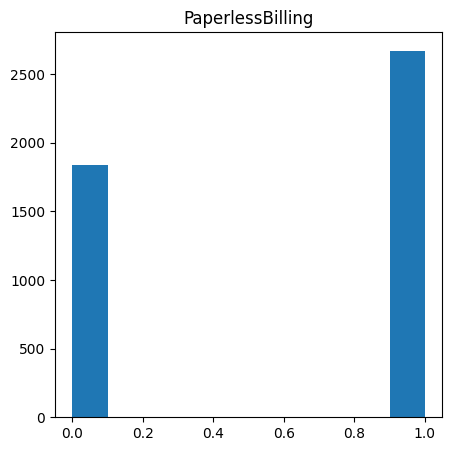

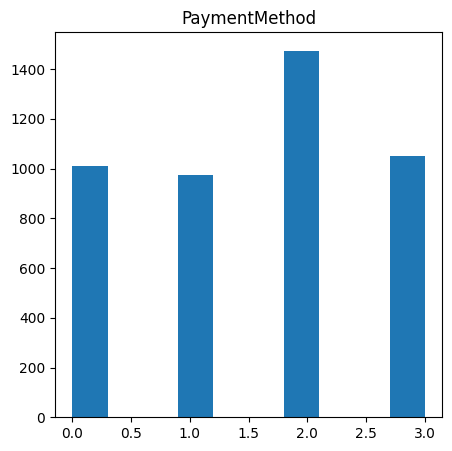

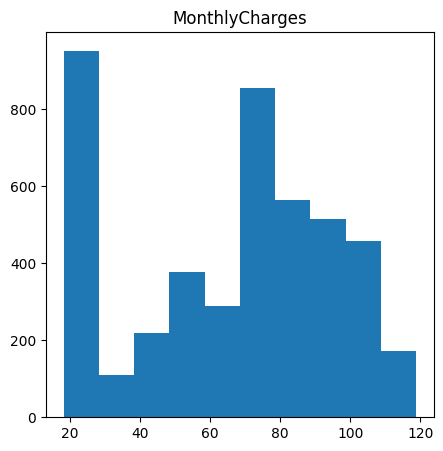

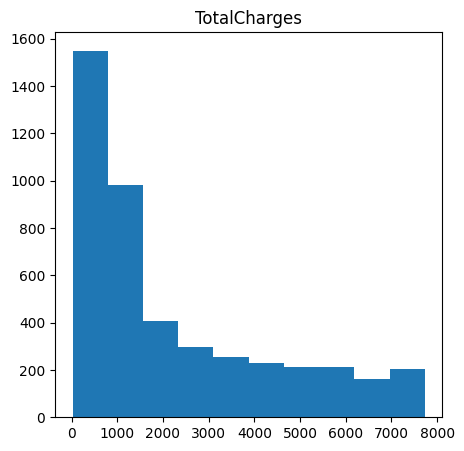

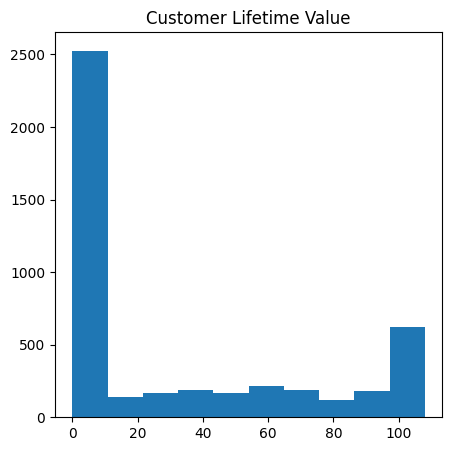

In [37]:
num_cols1 = x_train.select_dtypes(np.number)
for i in num_cols1:
  plt.figure(figsize=(5,5))
  plt.title(i)
  plt.hist(x_train[i])

In [38]:
x_train

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Customer Lifetime Value
4082,1,0,1,1,50,1,2,1,2,2,2,0,2,2,1,1,2,108.25,5431.40,50
1728,1,1,0,0,9,1,0,0,0,0,0,2,0,0,0,0,3,49.20,447.90,0
2795,0,0,0,0,3,1,0,1,0,2,0,2,2,2,0,1,2,97.90,315.30,0
334,1,0,0,0,36,1,0,2,1,1,1,1,1,1,1,1,1,20.35,695.85,36
3625,0,1,0,0,30,0,1,0,0,0,2,0,2,0,0,1,2,40.30,1172.95,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3772,1,0,1,0,38,1,2,0,0,0,2,2,0,2,1,0,1,69.00,2669.45,38
5191,1,1,1,1,68,1,0,2,1,1,1,1,1,1,1,0,0,19.50,1193.55,68
5226,0,0,1,1,54,1,2,0,2,0,0,2,0,0,2,0,0,60.00,3273.95,90
5390,1,0,0,0,3,1,0,0,0,0,0,2,2,2,0,1,2,69.35,1396.45,0


In [39]:
min= MinMaxScaler()
x_train[['tenure','MonthlyCharges','TotalCharges','Customer Lifetime Value']] = min.fit_transform(x_train[['tenure','MonthlyCharges','TotalCharges','Customer Lifetime Value']])
x_test[['tenure','MonthlyCharges','TotalCharges','Customer Lifetime Value']]= min.transform(x_test[['tenure','MonthlyCharges','TotalCharges','Customer Lifetime Value']])

In [37]:
y_train

,Churn
4082,0
1728,0
2795,1
334,0
3625,1
...,...
3772,0
5191,0
5226,0
5390,1


Logistic Regression

In [40]:
log_model1 = LogisticRegression()
log_model1.fit(x_train,y_train)
y_pred = log_model1.predict(x_test)
print("Accuracy score is",accuracy_score(y_test,y_pred))
print("Presicion score is",precision_score(y_test,y_pred,average ='weighted'))
print("Recall score is",recall_score(y_test,y_pred,average ='weighted'))
print("f1 score is",f1_score(y_test,y_pred,average ='weighted'))

Accuracy score is 0.7941437444543035
Presicion score is 0.7865398180629993
Recall score is 0.7941437444543035
f1 score is 0.7883915819392981


KNN

In [41]:
metric_k = []
neighbours = np.arange(3,15)

In [42]:
for k in neighbours:
  classifier = KNeighborsClassifier(n_neighbors = k, metric ='minkowski',p=2)
  classifier.fit(x_train,y_train)
  y_pred1 = classifier.predict(x_test)
  acc = accuracy_score(y_test,y_pred1)
  metric_k.append(acc)

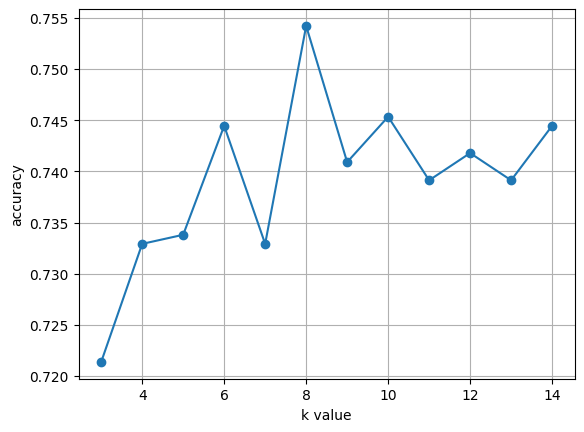

In [43]:
plt.plot(neighbours,metric_k,'o-')
plt.xlabel('k value')
plt.ylabel('accuracy')
plt.grid()

In [44]:
classifier1 = KNeighborsClassifier(n_neighbors = 8,metric ='minkowski',p=2)
classifier1.fit(x_train,y_train)
y_pred2 = classifier1.predict(x_test)
print("Accuracy score is",accuracy_score(y_test,y_pred2))
print("Presicion score is",precision_score(y_test,y_pred2))
print("Recall score is",recall_score(y_test,y_pred2))
print("f1 score is",f1_score(y_test,y_pred2))
confusion_matrix(y_test, y_pred2)

Accuracy score is 0.7542147293700089
Presicion score is 0.5959183673469388
Recall score is 0.4506172839506173
f1 score is 0.5131810193321616


array([[704,  99],
       [178, 146]])

Decision Tree

Accuracy score is 0.7346938775510204
Presicion score is 0.5266524520255863
Recall score is 0.7623456790123457
f1 score is 0.6229508196721312
[[581 222]
 [ 77 247]]


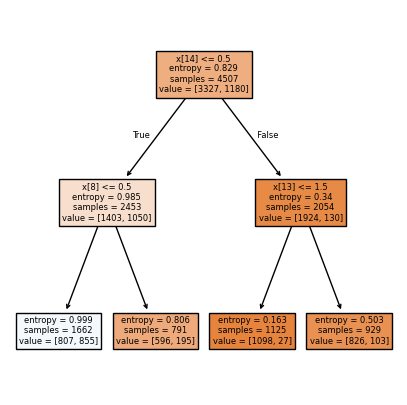

In [45]:
clf = DecisionTreeClassifier(criterion='entropy', max_depth=2,random_state=42,min_samples_leaf=4)
clf.fit(x_train,y_train)
y_pred3 = clf.predict(x_test)
print("Accuracy score is",accuracy_score(y_test,y_pred3))
print("Presicion score is",precision_score(y_test,y_pred3))
print("Recall score is",recall_score(y_test,y_pred3))
print("f1 score is",f1_score(y_test,y_pred3))
print(confusion_matrix(y_test, y_pred3))
plt.figure(figsize=(5,5))
tree.plot_tree(clf, filled=True)
plt.show()

Random Forest

In [46]:
ran = RandomForestClassifier(n_estimators=100, criterion='entropy', max_features='sqrt',
                             bootstrap =True, random_state=42)
ran.fit(x_train,y_train)
y_pred4 =ran.predict(x_test)
ran.score(x_test,y_test)

0.7710736468500443

In [47]:
print("Accuracy score is",accuracy_score(y_test,y_pred4))
print("Presicion score is",precision_score(y_test,y_pred4))
print("Recall score is",recall_score(y_test,y_pred4))
print("f1 score is",f1_score(y_test,y_pred4))
print(confusion_matrix(y_test, y_pred4))

Accuracy score is 0.7710736468500443
Presicion score is 0.632
Recall score is 0.4876543209876543
f1 score is 0.5505226480836237
[[711  92]
 [166 158]]


In [48]:
ran.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'entropy',
 'max_depth': None,
 'max_features': 'sqrt',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'monotonic_cst': None,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 42,
 'verbose': 0,
 'warm_start': False}

**MODEL TESTING ON TESTING DATASET**

In [49]:
df2 = pd.read_csv("/content/Testing_data.csv")
df2

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,6080-TCMYC,Male,0,Yes,Yes,40,Yes,Yes,Fiber optic,No,...,Yes,No,No,No,Month-to-month,Yes,Electronic check,81.20,3292.3,No
1,7285-KLOTR,Female,0,Yes,No,12,Yes,Yes,DSL,Yes,...,Yes,No,Yes,Yes,One year,No,Electronic check,78.85,876.75,No
2,7486-KSRVI,Male,0,No,No,43,Yes,Yes,Fiber optic,No,...,No,Yes,Yes,Yes,One year,Yes,Electronic check,100.00,4211.55,Yes
3,9924-JPRMC,Male,0,No,No,72,Yes,Yes,Fiber optic,Yes,...,Yes,Yes,Yes,Yes,Two year,Yes,Electronic check,118.20,8547.15,No
4,4439-YRNVD,Female,0,No,No,10,No,No phone service,DSL,No,...,No,Yes,No,No,Month-to-month,No,Electronic check,36.25,374,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1404,2039-JONDJ,Male,0,No,No,27,Yes,No,DSL,Yes,...,No,No,No,No,One year,No,Bank transfer (automatic),55.45,1477.65,No
1405,2516-VQRRV,Female,1,No,No,2,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,75.45,158.4,Yes
1406,5570-PTWEH,Female,0,Yes,No,3,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Credit card (automatic),75.15,216.75,Yes
1407,1722-LDZJS,Male,0,Yes,Yes,53,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,One year,No,Credit card (automatic),20.20,1068.15,No


In [50]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1409 entries, 0 to 1408
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        1409 non-null   object 
 1   gender            1409 non-null   object 
 2   SeniorCitizen     1409 non-null   int64  
 3   Partner           1409 non-null   object 
 4   Dependents        1409 non-null   object 
 5   tenure            1409 non-null   int64  
 6   PhoneService      1409 non-null   object 
 7   MultipleLines     1409 non-null   object 
 8   InternetService   1409 non-null   object 
 9   OnlineSecurity    1409 non-null   object 
 10  OnlineBackup      1409 non-null   object 
 11  DeviceProtection  1409 non-null   object 
 12  TechSupport       1409 non-null   object 
 13  StreamingTV       1409 non-null   object 
 14  StreamingMovies   1409 non-null   object 
 15  Contract          1409 non-null   object 
 16  PaperlessBilling  1409 non-null   object 


In [51]:
df2.duplicated().sum()

np.int64(0)

In [52]:
df2['TotalCharges'] = pd.to_numeric(df2['TotalCharges'],errors='coerce')

In [53]:
num_cols22 = df2.select_dtypes(np.number)
num_cols22

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
0,0,40,81.20,3292.30
1,0,12,78.85,876.75
2,0,43,100.00,4211.55
3,0,72,118.20,8547.15
4,0,10,36.25,374.00
...,...,...,...,...
1404,0,27,55.45,1477.65
1405,1,2,75.45,158.40
1406,0,3,75.15,216.75
1407,0,53,20.20,1068.15


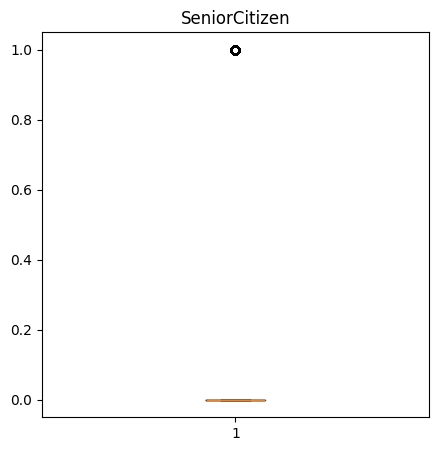

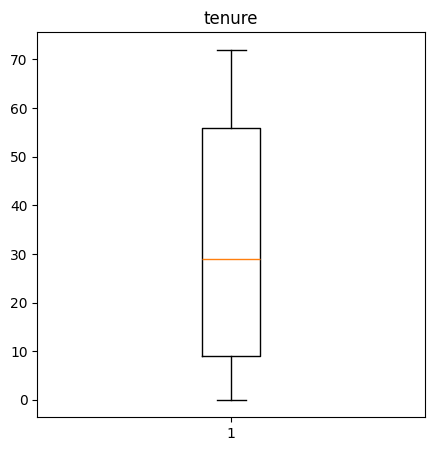

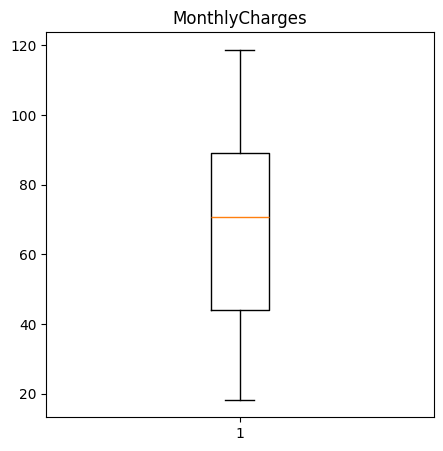

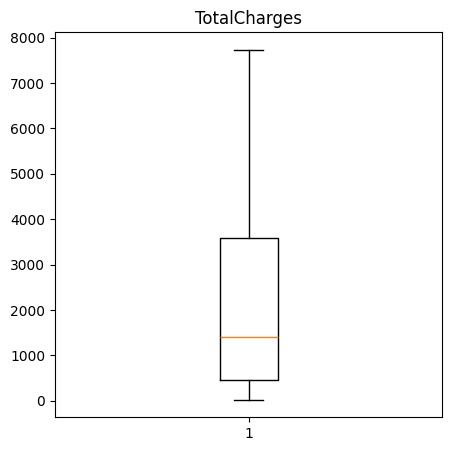

In [54]:
for i in num_cols22:

  plt.figure(figsize=(5,5))
  plt.title(i)
  plt.boxplot(df[i])

In [55]:
df2['Contract'] = la.fit_transform(df2['Contract'])

In [56]:
df2['Customer Lifetime Value'] = df2['tenure'] * df2['Contract']
df2

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,Customer Lifetime Value
0,6080-TCMYC,Male,0,Yes,Yes,40,Yes,Yes,Fiber optic,No,...,No,No,No,0,Yes,Electronic check,81.20,3292.30,No,0
1,7285-KLOTR,Female,0,Yes,No,12,Yes,Yes,DSL,Yes,...,No,Yes,Yes,1,No,Electronic check,78.85,876.75,No,12
2,7486-KSRVI,Male,0,No,No,43,Yes,Yes,Fiber optic,No,...,Yes,Yes,Yes,1,Yes,Electronic check,100.00,4211.55,Yes,43
3,9924-JPRMC,Male,0,No,No,72,Yes,Yes,Fiber optic,Yes,...,Yes,Yes,Yes,2,Yes,Electronic check,118.20,8547.15,No,144
4,4439-YRNVD,Female,0,No,No,10,No,No phone service,DSL,No,...,Yes,No,No,0,No,Electronic check,36.25,374.00,No,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1404,2039-JONDJ,Male,0,No,No,27,Yes,No,DSL,Yes,...,No,No,No,1,No,Bank transfer (automatic),55.45,1477.65,No,27
1405,2516-VQRRV,Female,1,No,No,2,Yes,Yes,Fiber optic,No,...,No,No,No,0,Yes,Mailed check,75.45,158.40,Yes,0
1406,5570-PTWEH,Female,0,Yes,No,3,Yes,Yes,Fiber optic,No,...,No,No,No,0,Yes,Credit card (automatic),75.15,216.75,Yes,0
1407,1722-LDZJS,Male,0,Yes,Yes,53,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,1,No,Credit card (automatic),20.20,1068.15,No,53


In [57]:
df2['gender'] = la.fit_transform(df2['gender'])
df2['Partner'] = la.fit_transform(df2['Partner'])
df2['Dependents'] = la.fit_transform(df2['Dependents'])
df2['PhoneService'] = la.fit_transform(df2['PhoneService'])
df2['MultipleLines'] = la.fit_transform(df2['MultipleLines'])
df2['InternetService'] = la.fit_transform(df2['InternetService'])
df2['OnlineSecurity'] = la.fit_transform(df2['OnlineSecurity'])
df2['OnlineBackup'] = la.fit_transform(df2['OnlineBackup'])
df2['DeviceProtection'] = la.fit_transform(df2['DeviceProtection'])
df2['TechSupport'] = la.fit_transform(df2['TechSupport'])
df2['StreamingTV'] = la.fit_transform(df2['StreamingTV'])
df2['StreamingMovies'] = la.fit_transform(df2['StreamingMovies'])

df2['PaperlessBilling'] = la.fit_transform(df2['PaperlessBilling'])
df2['PaymentMethod'] = la.fit_transform(df2['PaymentMethod'])
df2['Churn'] = la.fit_transform(df2['Churn'])

In [58]:
ytest =df2['Churn']
xtest = df2.drop(columns=['Churn','customerID'])

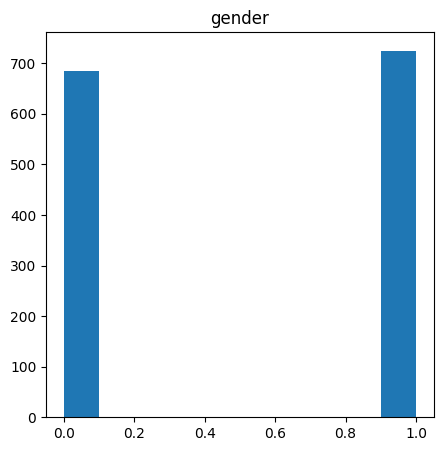

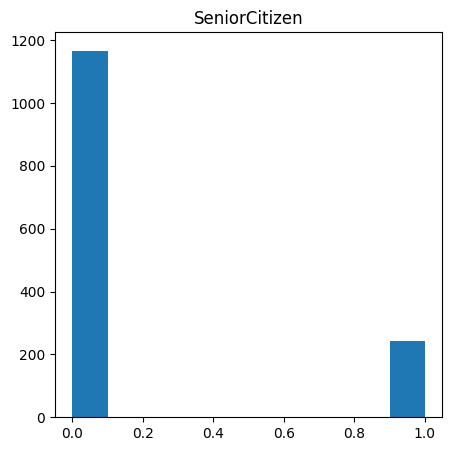

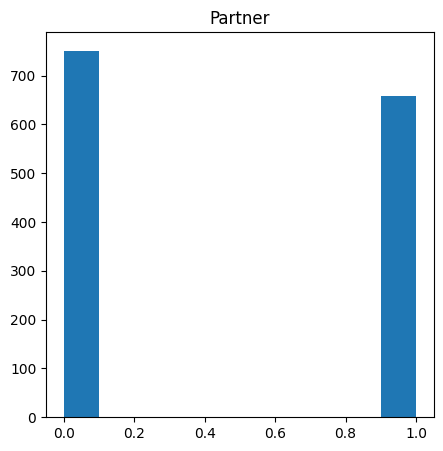

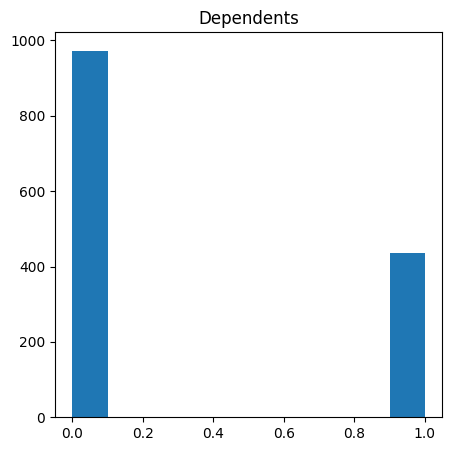

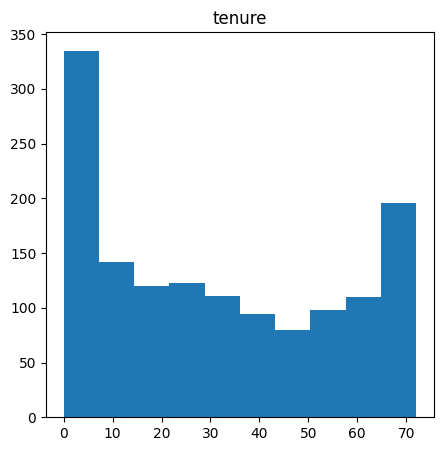

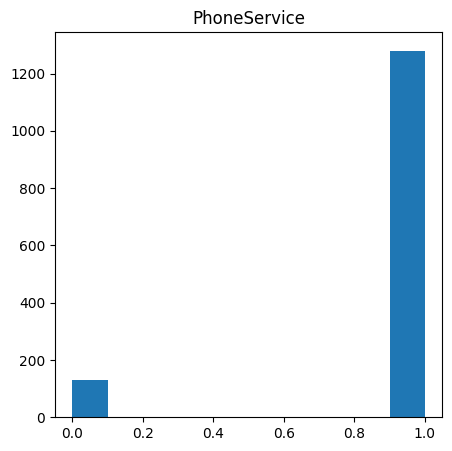

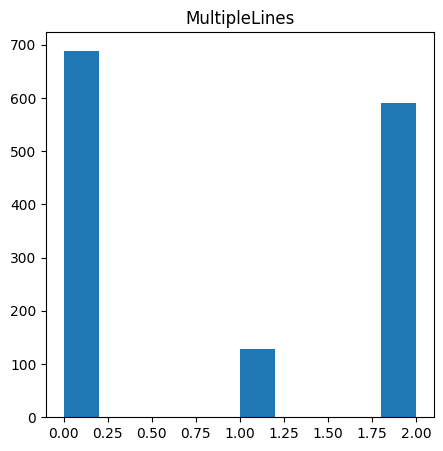

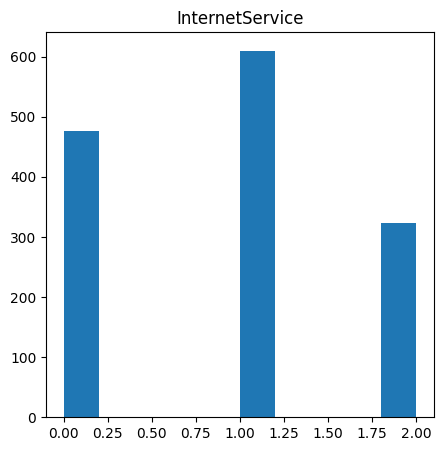

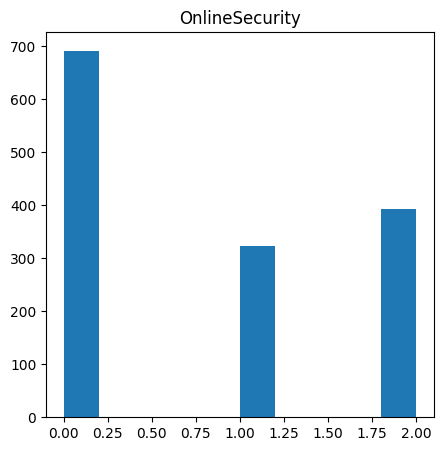

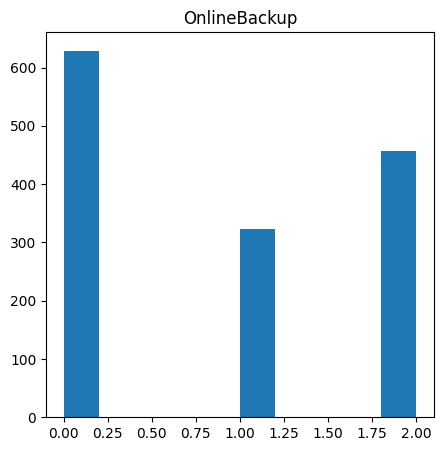

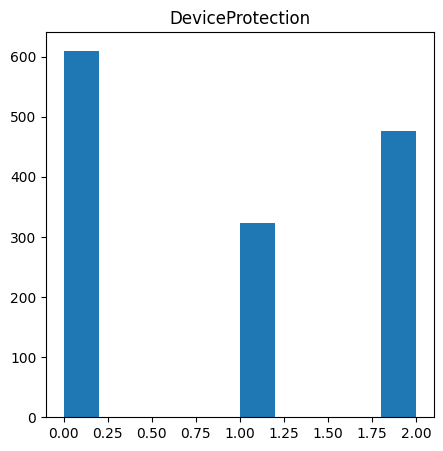

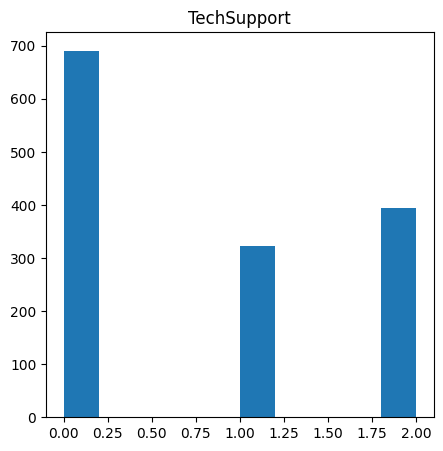

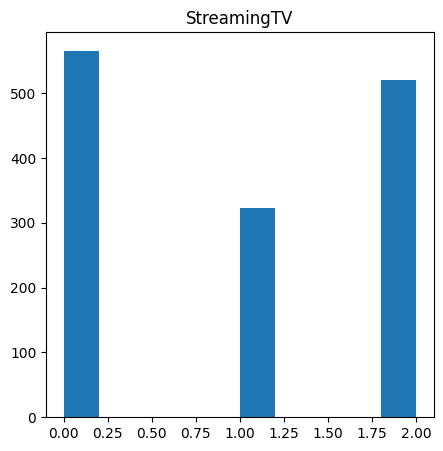

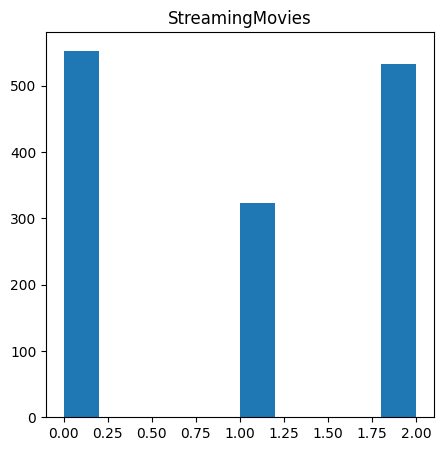

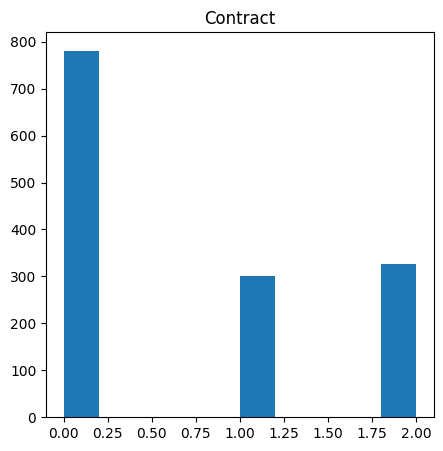

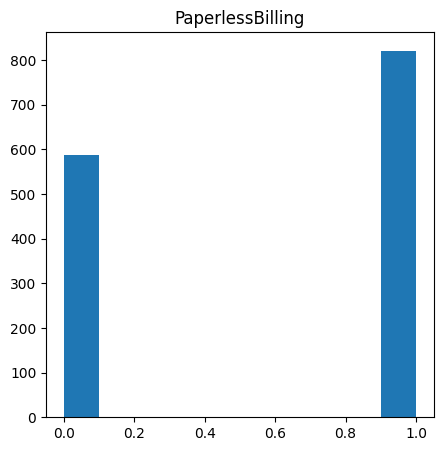

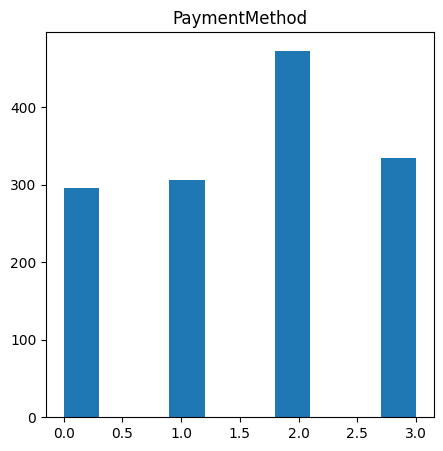

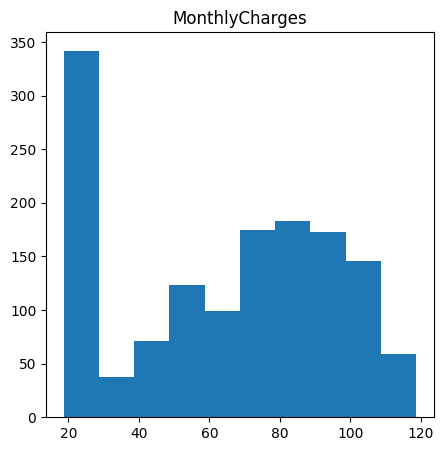

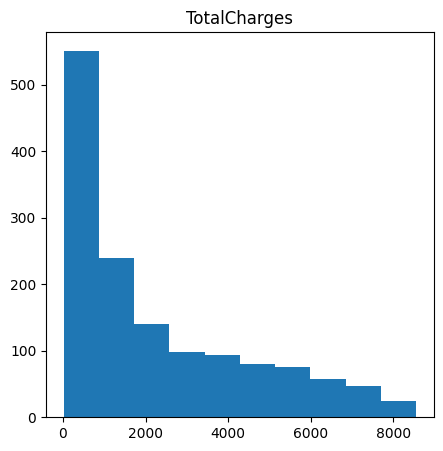

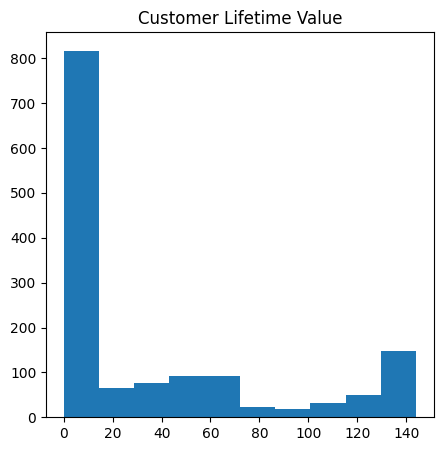

In [59]:
num_cols23 = xtest.select_dtypes(np.number)
for i in num_cols23:
  plt.figure(figsize=(5,5))
  plt.title(i)
  plt.hist(xtest[i])

In [60]:
xtest[['tenure','MonthlyCharges','TotalCharges','Customer Lifetime Value']] = min.transform(xtest[['tenure','MonthlyCharges','TotalCharges','Customer Lifetime Value']])

In [61]:
xtest.isna().sum()

,0
gender,0
SeniorCitizen,0
Partner,0
Dependents,0
tenure,0
PhoneService,0
MultipleLines,0
InternetService,0
OnlineSecurity,0
OnlineBackup,0


In [62]:
xtest['TotalCharges'].fillna(xtest['TotalCharges'].median(), inplace =True)

/tmp/ipython-input-389342889.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  xtest['TotalCharges'].fillna(xtest['TotalCharges'].median(), inplace =True)


LOGISTIC REGRESSION

In [63]:
y_pred5 = log_model1.predict(xtest)
print("Accuracy score is",accuracy_score(ytest,y_pred5))
print("Presicion score is",precision_score(ytest,y_pred5,average ='weighted'))
print("Recall score is",recall_score(ytest,y_pred5,average ='weighted'))
print("f1 score is",f1_score(ytest,y_pred5,average ='weighted'))

Accuracy score is 0.8126330731014905
Presicion score is 0.80313161051151
Recall score is 0.8126330731014905
f1 score is 0.8047991849261414


**KNN**

In [64]:
y_pred6 = classifier1.predict(xtest)
print("Accuracy score is",accuracy_score(ytest,y_pred6))
print("Presicion score is",precision_score(ytest,y_pred6))
print("Recall score is",recall_score(ytest,y_pred6))
print("f1 score is",f1_score(ytest,y_pred6))
confusion_matrix(ytest, y_pred6)

Accuracy score is 0.7806955287437899
Presicion score is 0.6068702290076335
Recall score is 0.43561643835616437
f1 score is 0.507177033492823


array([[941, 103],
       [206, 159]])

**DECISION TREE**

In [65]:
y_pred7 = clf.predict(xtest)
print("Accuracy score is",accuracy_score(ytest,y_pred7))
print("Presicion score is",precision_score(ytest,y_pred7))
print("Recall score is",recall_score(ytest,y_pred7))
print("f1 score is",f1_score(ytest,y_pred7))
print(confusion_matrix(ytest, y_pred7))

Accuracy score is 0.7281760113555713
Presicion score is 0.4823529411764706
Recall score is 0.673972602739726
f1 score is 0.5622857142857143
[[780 264]
 [119 246]]


**RANDOM FOREST**

In [66]:
y_pred8 =ran.predict(xtest)
ran.score(xtest,ytest)
print("Accuracy score is",accuracy_score(ytest,y_pred8))
print("Presicion score is",precision_score(ytest,y_pred8))
print("Recall score is",recall_score(ytest,y_pred8))
print("f1 score is",f1_score(ytest,y_pred8))
print(confusion_matrix(ytest, y_pred8))

Accuracy score is 0.7920511000709723
Presicion score is 0.625
Recall score is 0.4931506849315068
f1 score is 0.5513016845329249
[[936 108]
 [185 180]]


The most apt model for theprediction is logistic refgression followed by random forest. The accuracy, precision, recall and f1-score were comparatively better for Logistic Regression. The company should be able to give attractive discounts and speed to retain the customers.